## Cleaning air quality data

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

This notebook imports three years of air quality data from Farminton Community Hall, a small town in Northeast British Columbia. Data was downloaded from the following website: https://envistaweb.env.gov.bc.ca/
The dataset includes six pollutants, measured hourly. They are NOx, SO2, NO, NO2, TRS, and O3. All units are in ppb.

In [26]:
# Load in Farmington Community Hall AQ Monitor data into a pd df
# Note that the second row contains the header names in the csv
year1 = pd.read_csv(r'C:\Users\efarr\PycharmProjects\CIV1498Project2\0-Raw_data\2019_aq_data.csv', header=[1])
year2 = pd.read_csv(r'C:\Users\efarr\PycharmProjects\CIV1498Project2\0-Raw_data\2020_aq_data.csv', header=[1])
year3 = pd.read_csv(r'C:\Users\efarr\PycharmProjects\CIV1498Project2\0-Raw_data\2021_aq_data.csv', header=[1])

year1.tail(10)

,Date,Time,NOx,SO2,NO,NO2,TRS,O3
8759,12/31/2019,10:00 PM,0.9,0.2,0.2,0.8,0.4,22.5
8760,12/31/2019,11:00 PM,1,0.1,0.3,0.8,0.3,20.2
8761,Minimum,NaN,0.1,0,0,0,0,0
8762,Min Date,NaN,10/6/2019 4:00,1/7/2019 20:00,12/31/2018 24:00 AM,11/17/2019 24:00 AM,1/1/2019 4:00,1/8/2019 18:00
8763,Maximum,NaN,59.6,44.5,51.3,34.1,1.8,60.7
8764,Max Date,NaN,6/16/2019 1:00,2/4/2019 16:00,6/16/2019 1:00,1/8/2019 18:00,10/20/2019 22:00,3/21/2019 15:00
8765,Avg,NaN,3.7,0.3,0.8,2.9,0.2,25.2
8766,Num,NaN,8366,8248,8366,8366,8301,8368
8767,Data[%],NaN,96,94,96,96,95,96
8768,STD,NaN,4.6,0.8,2.3,3.3,0.1,11.7


We can see that the last 8 rows of the dataframe contains statistical information rather than hourly measurements. The first row of the dataframe contains the unit of measurement for each column rather than hourly measurements. The first column contains the date and the second column contains the time of measurement.

In [27]:
def clean_aq_data(df):
    # A function that takes in a raw dataframe of air quality data and fixes the data types, combines
    # the date and time columns into a DateTimeIndex and returns the dataframe

    # Drop the first row and the last eight statistical summary rows
    df = df[1:-8]

    # Define datatypes
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df[["NOx", "SO2", "NO", "NO2", "TRS", "O3"]] = df[["NOx", "SO2", "NO", "NO2", "TRS", "O3"]].astype(float)

    # Turn data and time columns into a DateTimeIndex
    format = '%m/%d/%Y %I:%M %p'
    df['Date'] = df[['Date', 'Time']].agg(' '.join, axis =1)
    df['Date'] = df['Date'].str.replace('24:00', '12:00')
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str), format=format)
    df = df.set_index(pd.DatetimeIndex(df['Datetime']))
    df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)


    return df

In [28]:
# Run aq dataframes through function to clean
year1 = clean_aq_data(year1)
year2 = clean_aq_data(year2)
year3 = clean_aq_data(year3)

# View data frame
year1.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2018-12-31 00:00:00,0.6,0.4,0.0,0.6,0.6,38.3
2019-01-01 01:00:00,1.2,0.4,0.2,1.0,0.7,37.6
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.6,0.2,0.1,0.5,0.1,38.1
2019-01-01 04:00:00,1.7,0.1,0.1,1.6,0.0,36.7


Now that all years of weather data have been cleaned, they can be combined into one dataframe. Looking at the head and tail of the dataframes, we can see that some hourly measurements are not within the year specified. These can be removed to prevent overlap when combining the dataframes

In [29]:
# Remove any hourly measurements that are not part of the year to prevent overlap when combining dataframes
# Filter data between two dates
year1 = year1.loc[(year1.index >= '2019-01-01')
                                          & (year1.index < '2020-01-01')]
year2 = year2.loc[(year2.index >= '2020-01-01')
                                          & (year2.index < '2021-01-01')]
year3 = year3.loc[(year3.index >= '2021-01-01')
                                          & (year3.index < '2022-01-01')]

# Combine 3 years
FarmingtonCommunityHall_AQ = pd.concat([year1, year2, year3], ignore_index=True)
FarmingtonCommunityHall_AQ.tail(24)

,NOx,SO2,NO,NO2,TRS,O3
26277,5.9,0.1,0.0,5.9,0.0,20.0
26278,4.9,0.1,0.1,4.9,-0.1,20.9
26279,3.8,0.0,0.0,3.8,-0.1,24.1
26280,3.8,0.1,0.1,3.7,-0.2,21.7
26281,4.0,0.0,0.0,4.0,-0.2,22.1
26282,5.7,0.0,0.2,5.5,-0.1,19.8
26283,4.2,0.1,0.1,4.1,-0.1,20.1
26284,4.0,0.0,0.0,4.0,-0.1,20.5
26285,5.2,0.0,0.1,5.1,-0.1,19.3
26286,5.6,0.1,0.4,5.1,-0.1,19.5


In [30]:
# Assess the dataframe for any missing values
print(len(FarmingtonCommunityHall_AQ))
FarmingtonCommunityHall_AQ.isnull().sum()

26301


NOx    1377
SO2    1513
NO     1377
NO2    1377
TRS    1737
O3     1360
dtype: int64

We can see that all columns are missing some data points.
NOx: 5.24% missing values
SO2: 5.75% missing values
NO: 5.24% missing values
NO2: 5.24% missing values
TRS: 6.60% missing values
O3: 5.17% missing values

These missing values will be filled using linear interpolation.

In [31]:
# Linear interpolation for missing values
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ.interpolate(method='linear', axis = 0)

# Check if there are any missing values
FarmingtonCommunityHall_AQ.isna().sum()

NOx    0
SO2    0
NO     0
NO2    0
TRS    0
O3     0
dtype: int64

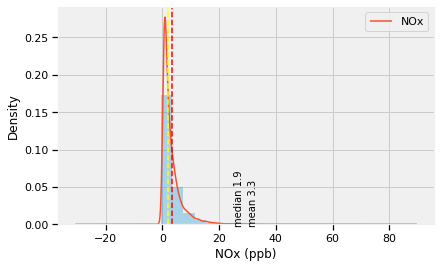

In [32]:
ax = FarmingtonCommunityHall_AQ["NOx"].hist(bins=15, density=True, stacked=True, alpha=0.3)
FarmingtonCommunityHall_AQ["NOx"].plot(kind='density')

ax.set(xlabel='NOx (ppb)')
plt.axvline(x=FarmingtonCommunityHall_AQ["NOx"].mean(), color = 'red', ls='--')
plt.axvline(x=FarmingtonCommunityHall_AQ["NOx"].median(), color = 'yellow', ls='--')
plt.text(30.1,0,'mean {}'.format(round(FarmingtonCommunityHall_AQ["NOx"].mean(),1)),rotation=90)
plt.text(25.1,0,'median {}'.format(round(FarmingtonCommunityHall_AQ["NOx"].median(),1)),rotation=90)


plt.legend()
plt.show()

Text(0, 0.5, 'O3 (ppb)')

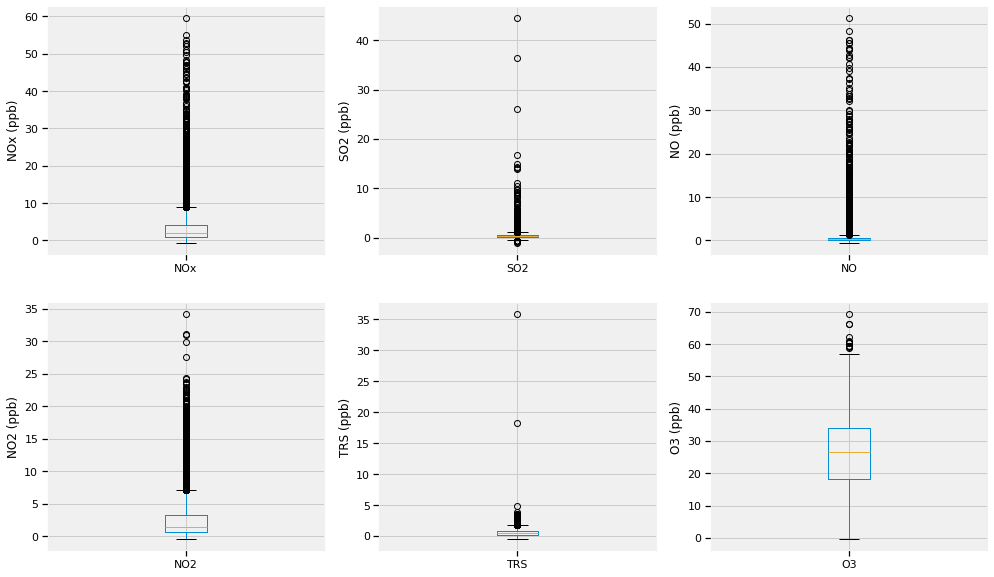

In [33]:
# Check for outliers
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = FarmingtonCommunityHall_AQ.boxplot(column='NOx')
fig.set_title('')
fig.set_ylabel('NOx (ppb)')


plt.subplot(2, 3, 2)
fig = FarmingtonCommunityHall_AQ.boxplot(column='SO2')
fig.set_title('')
fig.set_ylabel('SO2 (ppb)')


plt.subplot(2, 3, 3)
fig = FarmingtonCommunityHall_AQ.boxplot(column='NO')
fig.set_title('')
fig.set_ylabel('NO (ppb)')


plt.subplot(2, 3, 4)
fig = FarmingtonCommunityHall_AQ.boxplot(column='NO2')
fig.set_title('')
fig.set_ylabel('NO2 (ppb)')


plt.subplot(2, 3, 5)
fig = FarmingtonCommunityHall_AQ.boxplot(column='TRS')
fig.set_title('')
fig.set_ylabel('TRS (ppb)')

plt.subplot(2, 3, 6)
fig = FarmingtonCommunityHall_AQ.boxplot(column='O3')
fig.set_title('')
fig.set_ylabel('O3 (ppb)')

While there are outliers, they will not be removed. They may be due to actual spikes in pollution, and it is difficult to distinguish this from possible instrument errors.

In [34]:
# Remove rows where concentration is less than 0
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['NOx'] >= 0]
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['SO2'] >= 0]
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['NO'] >= 0]
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['NO2'] >= 0]
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['TRS'] >= 0]
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ[FarmingtonCommunityHall_AQ['O3'] >= 0]

In [35]:
print(len(FarmingtonCommunityHall_AQ))

23880


This dropped 2,421 rows.

In [36]:
FarmingtonCommunityHall_AQ.to_csv("FarmingtonCommunityHall_AQ.csv")

In [ ]:
# Calculate the mean of all pollutants over a 24 period
FarmingtonCommunityHall_AQ_Daily = FarmingtonCommunityHall_AQ.resample('D').mean()
FarmingtonCommunityHall_AQ_Daily.head()

In [ ]:
# Calculate the mean of all pollutants over a 24 period
FarmingtonCommunityHall_AQ_Monthly = FarmingtonCommunityHall_AQ.resample('M').mean()
FarmingtonCommunityHall_AQ_Monthly.head()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['O3'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['O3'], 'r', label = 'Monthly Mean')

plt.ylabel('O3 Concentration (ppb)')
plt.xlabel('Date', fontsize=14)

plt.legend()
plt.title('Daily Ozone (ppb) Concentration', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NOx'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NOx'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('NOx (ppb)')


plt.title('Daily NOx Concentration', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['SO2'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['SO2'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SO2 (ppb)')


plt.title('Daily SO2 Concentration', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NO'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NO'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('NO (ppb)')


plt.title('Daily NO Concentration', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NO2'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NO2'], 'r', label = 'Monthly Mean')


plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 (ppb)')


plt.title('Daily NO2 Concentration', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['TRS'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['TRS'], 'r', label = 'Monthly Mean')


plt.xlabel('Date', fontsize=14)
plt.ylabel('TRS (ppb)')


plt.title('Daily TRS Concentration', fontsize=16)
plt.show()

In [ ]:
# Drop O3 from dataframe for boxplot
no_O3 = FarmingtonCommunityHall_AQ.drop(['O3'], axis=1)
O3 = FarmingtonCommunityHall_AQ[['O3']]
O3.head()

In [ ]:
# Distribution of concentrations over 3 year period
sns.boxplot(x="variable", y="value", data=pd.melt(no_O3),
           showfliers = False)

In [ ]:
# Distribution for O3 over 3 year period
sns.boxplot(x="variable", y="value", data=pd.melt(no_O3),
           showfliers = False)